# Test LCNN

In [3]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from torch.utils.data import DataLoader

from EoR_Dataset import EOREncodedImageDataset
from util.plotting import plot_image_grid

cfg = OmegaConf.load('../trained_models/p21c_ws0.0/lcnn_v23_p21c_ws0.0_2025-01-13T21-20/lcnn_v23_p21c_ws0.0_2025-01-13T21-20_config.yaml')


In [ ]:
test_data = EOREncodedImageDataset("val", cfg)
#test_dataloader = DataLoader(test_data, batch_size=base_cfg.model.batchsize)

i=0
x, y = test_data[i]

print(y)

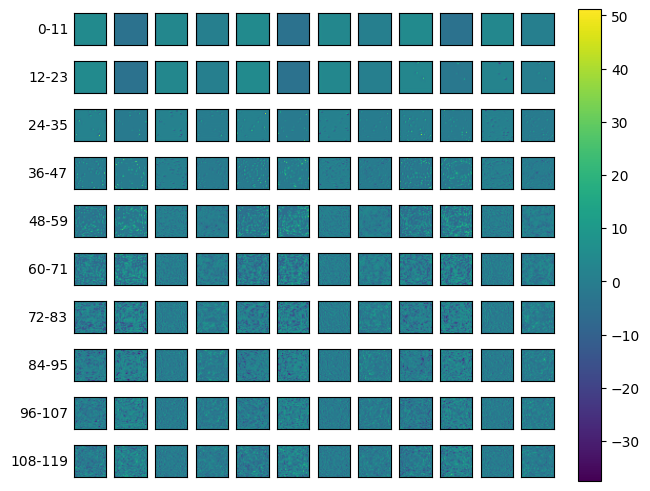

In [12]:
%matplotlib inline

plot_image_grid(x)

In [4]:
import torch
from regressors.latent_cnn import lcnn


model = lcnn(cfg)
path = f"../trained_models/p21c_ws0.0/lcnn_v23_p21c_ws0.0_2025-01-13T21-20/lcnn_v23_p21c_ws0.0_2025-01-13T21-20.pth"

checkpoint = torch.load(path, weights_only=True, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])



<All keys matched successfully>

In [5]:
from torch import nn

print(model.conv_layers[2].weight)
#print(model.out.weight)


Parameter containing:
tensor([[[[ 3.5902e-02,  5.7395e-02,  2.4894e-02],
          [ 2.2882e-02,  2.8480e-02, -2.7024e-02],
          [-2.0569e-02, -3.3144e-02, -1.0094e-02]],

         [[ 8.0864e-03, -4.5962e-03,  4.1171e-03],
          [ 2.9007e-02, -6.2034e-02,  1.4684e-02],
          [-2.0188e-02,  9.3593e-03, -3.2734e-02]],

         [[-3.6569e-03,  2.8589e-02,  2.7524e-02],
          [ 1.6325e-02, -3.4055e-02, -2.3992e-02],
          [-3.3935e-02, -2.8739e-02, -1.2630e-02]],

         ...,

         [[ 3.9561e-03,  5.5228e-02,  4.2247e-02],
          [-1.0427e-03, -2.1998e-02, -4.6760e-02],
          [ 1.9057e-02, -8.4479e-03, -2.1105e-02]],

         [[-2.9320e-02, -2.7024e-03, -1.2959e-02],
          [ 1.9743e-02,  2.3735e-02, -1.1477e-02],
          [-2.7174e-03,  1.0317e-02, -3.2515e-03]],

         [[-3.5004e-02, -2.1871e-02, -1.9981e-02],
          [ 1.8165e-02,  1.6875e-04,  1.7511e-02],
          [ 3.3615e-03, -2.9990e-02, -1.9594e-02]]],


        [[[ 1.9231e-02,  7.8418

In [ ]:
xhat = model(x[None,:])
print(xhat)


tensor([[3.4743]], grad_fn=<AddmmBackward0>)
